<h1 style = "font-family: Bodoni; font-size: 64px'; line-height: .5"><center> The NBA Draft </center></h1>
<h2 style = "font-family: Bodoni; font-size: 24px'; line-height: 1.25"><center> By: Jai Upadhyay and Dylan Bourgerie </center></h2>

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">The 2019-2020 NBA season recently came to a close, as the Los Angeles Lakers defeated the Miami Heat 4-2 in the NBA finals. This past season was a wild ride, with the global COVID-19 pandemic leading to a several month gap in the middle of the NBA season. After months of no NBA basketball and much planning on how to safely continue the season, the NBA and the NBA Player's Association decided on hosting the rest of the season at the NBA <a href= "https://en.wikipedia.org/wiki/2020_NBA_Bubble">"bubble"</a>, located at Walt Disney World in Orlando, Florida. </p>

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">The bubble was home to many ridiculous and unpredictable performances, including the Phoenix Suns going undefeated in their remaining 8 regular season games, Jamal Murray and Donovan Mitchell scoring 50+ points against each other in the playoff matchup between the Utah Jazz and Denver Nuggets, and TJ Warren having stat lines reminiscent of prime Michael Jordan. Possibly most notable, however, was the rise of Miami Heat guard Tyler Herro, whose performance throughout the Heat's improbable Finals run sent shockwaves throughout the NBA world. Herro was even featured in the music video for the song titled <a href ="https://www.youtube.com/watch?v=np9Ub1LilKU"> "Tyler Herro"</a> by recent rap sensation Jack Harlow a few months after his memorable playoff run.</p> 

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">While Herro was for sure the rookie with the biggest impact in the NBA bubble, he was drafted just 13th overall by the Miami Heat. Clearly, Herro was a great draft pick by the Heat, when much less impactful players like R.J Barrett, third overall pick by the New York Knicks, were drafted before him. The Miami Heat’s success story with Tyler Herro, and even Bam Adebayo (14th overall pick in the 2017 NBA draft), begs the question: which NBA teams have drafted best in recent years?</p>

![2019_draft](images/draft_2019.jpg)



<p style = "font-family: Helvetica; font-size: 24px'; line-height: 1.5"><b>Data Gathering</b></p>

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">To begin we imported data from a csv file that contained season data for every NBA player from the 1996 season to the 2019 season. Our data contained many important stats about the player (name, team, age, draft year, draft round, draft pick number) and also important stats about their performance for each individual season like points per game, rebounds per game, assists per game, etc. Once we had this data we knew that we could begin our data tidying and exploratory data analysis to figure out which teams have been successful at drafting talented college hoopers.</p> 


In [1]:
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
import matplotlib as plt
import matplotlib.pyplot as pyplt
import requests
!pip install folium
import folium
from folium import IFrame
import base64
import seaborn as sns
from bs4 import BeautifulSoup
!{sys.executable} -m pip install html5lib
import sys
!{sys.executable} -m pip install lxml


sns.set(rc={'figure.figsize':(12,10)})
file = 'all_seasons.csv'
all_data = pd.read_csv(file)
all_data.sample(10)

/bin/bash: {sys.executable}: command not found


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
6290,6290,Lester Hudson,WAS,26.0,190.50,86.182480,Tennessee-Martin,USA,2009,2,...,1.6,0.5,1.5,-8.7,0.014,0.073,0.204,0.349,0.447,2010-11
8882,8882,DeAndre Jordan,LAC,27.0,210.82,120.201880,Texas A&M,USA,2008,2,...,12.7,13.8,1.2,10.2,0.115,0.321,0.154,0.628,0.051,2015-16
10683,10683,Eric Bledsoe,MIL,30.0,185.42,97.068688,Kentucky,USA,2010,1,...,15.2,4.7,5.4,13.9,0.026,0.120,0.235,0.577,0.273,2019-20
4481,4481,Dwight Howard,ORL,21.0,210.82,120.201880,None,USA,2004,1,...,17.6,12.3,1.9,0.7,0.120,0.288,0.226,0.619,0.092,2006-07
2631,2631,Eric Piatkowski,LAC,31.0,198.12,97.522280,Nebraska,USA,1994,1,...,8.8,2.6,1.6,-2.4,0.028,0.093,0.152,0.601,0.101,2001-02
6379,6379,Jameer Nelson,ORL,29.0,182.88,86.182480,Saint Joseph's,USA,2004,1,...,13.1,3.0,6.0,7.5,0.019,0.092,0.221,0.548,0.324,2010-11
4456,4456,Hassan Adams,NJN,23.0,193.04,99.790240,Arizona,USA,2006,2,...,2.9,1.3,0.2,2.6,0.089,0.095,0.164,0.577,0.043,2006-07
1235,1235,Dikembe Mutombo,ATL,33.0,218.44,118.387512,Georgetown,Congo,1991,1,...,10.8,12.2,1.1,6.0,0.127,0.265,0.144,0.584,0.056,1998-99
3178,3178,Travis Hansen,ATL,26.0,198.12,92.986360,Brigham Young,USA,2003,2,...,3.0,1.7,0.5,-0.9,0.068,0.090,0.139,0.433,0.059,2003-04
8061,8061,Anthony Randolph,DEN,24.0,210.82,102.058200,Louisiana State,USA,2008,1,...,4.8,2.8,0.7,-8.6,0.041,0.213,0.202,0.499,0.104,2013-14


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Here we’re just displaying the columns of our data.</p>

In [2]:
all_data.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

<p style = "font-family: Helvetica; font-size: 24px'; line-height: 1.5"><b>Data Tidying</b></p>

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5"> </p> 

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Once we had our data we were set to begin our data tidying. The first thing we decided to do was filter our data to only include seasons starting with the 2005 NBA season. Many basketball fans and critics have pointed to how the NBA game has <a href = "https://www.espn.com/nba/story/_/id/29113310/seven-ways-nba-changed-michael-jordan-bulls">changed drastically</a> over the years. They claim the league has become “softer” and more offense-oriented. So to avoid skewing our data we only included the last 15 years of basketball. To figure out which teams have made the best use of their first round picks we also filtered our data to only include first-round selections.</p>

In [3]:
# filtering for only first round selections
is_players_drafted_in_first_round = all_data['draft_round'] == '1'
players_drafted_in_first_round = all_data[is_players_drafted_in_first_round]
players_drafted_in_first_round = players_drafted_in_first_round.astype({'draft_year': 'int32'})

#filtering for years after 2005
is_players_drafted_after_2005 = players_drafted_in_first_round['draft_year'] >= 2005
players_drafted_round_one_and_after_2005 = players_drafted_in_first_round[is_players_drafted_after_2005]

players_drafted_round_one_and_after_2005

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
3985,3985,Marvin Williams,ATL,20.0,205.74,104.326160,North Carolina,USA,2005,1,...,8.5,4.8,0.8,-2.0,0.073,0.161,0.166,0.523,0.052,2005-06
3987,3987,Martell Webster,POR,19.0,200.66,95.254320,None,USA,2005,1,...,6.6,2.1,0.6,-14.6,0.029,0.120,0.183,0.533,0.055,2005-06
4010,4010,Nate Robinson,NYK,22.0,175.26,81.646560,Washington,USA,2005,1,...,9.3,2.3,2.0,-3.3,0.045,0.087,0.227,0.512,0.170,2005-06
4045,4045,Julius Hodge,DEN,22.0,200.66,95.254320,North Carolina State,USA,2005,1,...,0.9,0.5,0.4,-0.9,0.167,0.054,0.334,0.393,0.333,2005-06
4060,4060,Luther Head,HOU,23.0,190.50,83.914520,Illinois,USA,2005,1,...,8.8,3.3,2.7,-0.8,0.017,0.116,0.167,0.517,0.167,2005-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,11133,Marvin Williams,MIL,33.0,203.20,107.501304,North Carolina,USA,2005,1,...,6.2,2.8,1.0,-4.3,0.019,0.124,0.126,0.584,0.079,2019-20
11134,11134,Mason Plumlee,DEN,30.0,210.82,115.212368,Duke,USA,2013,1,...,7.4,5.4,2.4,1.3,0.094,0.196,0.177,0.619,0.201,2019-20
11135,11135,Matisse Thybulle,PHI,23.0,195.58,91.171992,Washington,USA,2019,1,...,4.6,1.5,1.2,1.2,0.031,0.047,0.111,0.522,0.085,2019-20
11138,11138,Maurice Harkless,NYK,26.0,200.66,99.790240,"St. John's, N.Y.",USA,2012,1,...,5.7,3.9,1.0,1.9,0.038,0.119,0.104,0.575,0.059,2019-20


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">The second step of our data tidying process was to only include seasons where the player played over 20 games. This allows us to only keep the significant seasons and also not give weight to seasons where the player may have been injured. For seasons under 20 games, we also anticipated that such a small sample size could skew the data. For example, if a player suffered a season-ending injury in their first game and only scored two points then we don’t want to weigh that season equally to a season where the player played a full 82 game regular season. </p>

In [33]:
#drop seasons under 20 games
is_over_20_games = players_drafted_round_one_and_after_2005['gp'] > 20
data_to_be_used = players_drafted_round_one_and_after_2005[is_over_20_games]
data_to_be_used

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
3985,3985,Marvin Williams,ATL,20.0,205.74,104.326160,North Carolina,USA,2005,1,...,8.5,4.8,0.8,-2.0,0.073,0.161,0.166,0.523,0.052,2005
3987,3987,Martell Webster,POR,19.0,200.66,95.254320,None,USA,2005,1,...,6.6,2.1,0.6,-14.6,0.029,0.120,0.183,0.533,0.055,2005
4010,4010,Nate Robinson,NYK,22.0,175.26,81.646560,Washington,USA,2005,1,...,9.3,2.3,2.0,-3.3,0.045,0.087,0.227,0.512,0.170,2005
4060,4060,Luther Head,HOU,23.0,190.50,83.914520,Illinois,USA,2005,1,...,8.8,3.3,2.7,-0.8,0.017,0.116,0.167,0.517,0.167,2005
4072,4072,Linas Kleiza,DEN,21.0,203.20,111.130040,Missouri,Lithuania,2005,1,...,3.5,1.9,0.2,-2.2,0.083,0.173,0.189,0.510,0.047,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,11133,Marvin Williams,MIL,33.0,203.20,107.501304,North Carolina,USA,2005,1,...,6.2,2.8,1.0,-4.3,0.019,0.124,0.126,0.584,0.079,2019
11134,11134,Mason Plumlee,DEN,30.0,210.82,115.212368,Duke,USA,2013,1,...,7.4,5.4,2.4,1.3,0.094,0.196,0.177,0.619,0.201,2019
11135,11135,Matisse Thybulle,PHI,23.0,195.58,91.171992,Washington,USA,2019,1,...,4.6,1.5,1.2,1.2,0.031,0.047,0.111,0.522,0.085,2019
11138,11138,Maurice Harkless,NYK,26.0,200.66,99.790240,"St. John's, N.Y.",USA,2012,1,...,5.7,3.9,1.0,1.9,0.038,0.119,0.104,0.575,0.059,2019


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Now the dataframe we made has every season for a first round draft pick where the player played over 20 games starting in 2005. From here we simply aggregated over player names to determine each player's career averages for points, rebounds, and assists, the three most widely looked at statistics for basketball.</p>

In [5]:
#aggregating points, rebounds, and assits for players
players = data_to_be_used.groupby('player_name', as_index = False).agg({'pts': 'mean', 'reb': 'mean', 'ast': 'mean'})
players

,player_name,pts,reb,ast
0,Aaron Brooks,8.880000,1.550000,2.760000
1,Aaron Gordon,12.516667,6.350000,2.300000
2,Aaron Holiday,7.750000,1.800000,2.500000
3,Acie Law,3.900000,1.000000,1.550000
4,Adam Morrison,6.066667,1.800000,1.166667
...,...,...,...,...
430,Xavier Henry,5.875000,1.975000,0.700000
431,Yaroslav Korolev,1.100000,0.500000,0.400000
432,Yi Jianlian,7.480000,4.640000,0.660000
433,Zach Collins,5.500000,3.750000,0.850000


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">In the NBA players are constantly switching teams through free agency (see some of the biggest free agency signings <a href= "https://bleacherreport.com/articles/2842294-the-10-best-nba-free-agency-signings-of-the-last-10-years">here</a>). To help us match the player with their draft team we needed to create a dataframe that only contains a player name with their draft information. This would allow us to later group players based on their draft team and figure out which teams have been the most successful at drafting.</p>

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">To start this process we had to do some more data tidying. The first step was to adjust the season column to only include the start year of the season by using some regular expressions.</p>


In [6]:
#adjusting the season to only have the starting year using regex
regex = "(?P<start_year>\d+)-\d\d"

for idx,row in players_drafted_round_one_and_after_2005.iterrows():
    reg = re.search(regex, row['season'])
    players_drafted_round_one_and_after_2005.at[idx, 'season'] = reg.group('start_year')
    
players_drafted_round_one_and_after_2005
    

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
3985,3985,Marvin Williams,ATL,20.0,205.74,104.326160,North Carolina,USA,2005,1,...,8.5,4.8,0.8,-2.0,0.073,0.161,0.166,0.523,0.052,2005
3987,3987,Martell Webster,POR,19.0,200.66,95.254320,None,USA,2005,1,...,6.6,2.1,0.6,-14.6,0.029,0.120,0.183,0.533,0.055,2005
4010,4010,Nate Robinson,NYK,22.0,175.26,81.646560,Washington,USA,2005,1,...,9.3,2.3,2.0,-3.3,0.045,0.087,0.227,0.512,0.170,2005
4045,4045,Julius Hodge,DEN,22.0,200.66,95.254320,North Carolina State,USA,2005,1,...,0.9,0.5,0.4,-0.9,0.167,0.054,0.334,0.393,0.333,2005
4060,4060,Luther Head,HOU,23.0,190.50,83.914520,Illinois,USA,2005,1,...,8.8,3.3,2.7,-0.8,0.017,0.116,0.167,0.517,0.167,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,11133,Marvin Williams,MIL,33.0,203.20,107.501304,North Carolina,USA,2005,1,...,6.2,2.8,1.0,-4.3,0.019,0.124,0.126,0.584,0.079,2019
11134,11134,Mason Plumlee,DEN,30.0,210.82,115.212368,Duke,USA,2013,1,...,7.4,5.4,2.4,1.3,0.094,0.196,0.177,0.619,0.201,2019
11135,11135,Matisse Thybulle,PHI,23.0,195.58,91.171992,Washington,USA,2019,1,...,4.6,1.5,1.2,1.2,0.031,0.047,0.111,0.522,0.085,2019
11138,11138,Maurice Harkless,NYK,26.0,200.66,99.790240,"St. John's, N.Y.",USA,2012,1,...,5.7,3.9,1.0,1.9,0.038,0.119,0.104,0.575,0.059,2019


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Now we filtered our dataframe to only include rows where the draft year is equal to the season year. By getting players rookie seasons, we are to see exactly which teams drafted them and what pick they were selected at, which is exactly what we need.</p>

In [7]:
#now adjusting the dataframe to only have seasons with draft year = start year
players_drafted_round_one_and_after_2005 = players_drafted_round_one_and_after_2005.astype({'season': 'int32'})
players_drafted_round_one_and_after_2005 = players_drafted_round_one_and_after_2005.astype({'draft_year': 'int32'})

filter_for_draft_year = players_drafted_round_one_and_after_2005['draft_year'] == players_drafted_round_one_and_after_2005['season']

players_rookies_years = players_drafted_round_one_and_after_2005[filter_for_draft_year]
players_rookies_years

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
3985,3985,Marvin Williams,ATL,20.0,205.74,104.326160,North Carolina,USA,2005,1,...,8.5,4.8,0.8,-2.0,0.073,0.161,0.166,0.523,0.052,2005
3987,3987,Martell Webster,POR,19.0,200.66,95.254320,None,USA,2005,1,...,6.6,2.1,0.6,-14.6,0.029,0.120,0.183,0.533,0.055,2005
4010,4010,Nate Robinson,NYK,22.0,175.26,81.646560,Washington,USA,2005,1,...,9.3,2.3,2.0,-3.3,0.045,0.087,0.227,0.512,0.170,2005
4045,4045,Julius Hodge,DEN,22.0,200.66,95.254320,North Carolina State,USA,2005,1,...,0.9,0.5,0.4,-0.9,0.167,0.054,0.334,0.393,0.333,2005
4060,4060,Luther Head,HOU,23.0,190.50,83.914520,Illinois,USA,2005,1,...,8.8,3.3,2.7,-0.8,0.017,0.116,0.167,0.517,0.167,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,11081,Luka Samanic,SAS,20.0,208.28,102.965384,None,Croatia,2019,1,...,0.0,2.0,3.0,26.9,0.000,0.133,0.154,0.000,0.333,2019
11097,11097,Nassir Little,POR,20.0,195.58,99.790240,North Carolina,USA,2019,1,...,3.6,2.3,0.5,-3.1,0.048,0.119,0.129,0.508,0.050,2019
11102,11102,Nickeil Alexander-Walker,NOP,21.0,195.58,92.986360,Virginia Tech,Canada,2019,1,...,5.1,2.0,1.8,-5.1,0.015,0.135,0.227,0.441,0.207,2019
11113,11113,Mfiondu Kabengele,LAC,22.0,205.74,113.398000,Florida State,Canada,2019,1,...,3.5,0.9,0.2,0.8,0.017,0.159,0.242,0.614,0.050,2019


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Now we only select the columns we need that correspond to their draft info. We already have players' career average and aren’t really interested in how they performed in their rookie year. So we drop any columns that didn’t correspond to a player’s draft year/position.</p>

In [8]:
#making data frame with players' draft info
players_and_draft_teams = players_rookies_years[['player_name', 'team_abbreviation', 'draft_round', 'draft_number', 'draft_year']]
players_and_draft_teams 

,player_name,team_abbreviation,draft_round,draft_number,draft_year
3985,Marvin Williams,ATL,1,2,2005
3987,Martell Webster,POR,1,6,2005
4010,Nate Robinson,NYK,1,21,2005
4045,Julius Hodge,DEN,1,20,2005
4060,Luther Head,HOU,1,24,2005
...,...,...,...,...,...
11081,Luka Samanic,SAS,1,19,2019
11097,Nassir Little,POR,1,25,2019
11102,Nickeil Alexander-Walker,NOP,1,17,2019
11113,Mfiondu Kabengele,LAC,1,27,2019


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">By doing a merge with the earlier dataframe we created a dataframe that contains a players draft info and their career averages. From here we’ll be able to tell which players were successful draft picks and which teams were especially good at selecting them.</p>

In [9]:
#merging data frames to include draft info and players averages
players_career_data = pd.merge(players_and_draft_teams, players, on = 'player_name')
players_career_data

,player_name,team_abbreviation,draft_round,draft_number,draft_year,pts,reb,ast
0,Marvin Williams,ATL,1,2,2005,10.226667,5.113333,1.280000
1,Martell Webster,POR,1,6,2005,8.311111,3.011111,0.988889
2,Nate Robinson,NYK,1,21,2005,10.660000,2.240000,2.890000
3,Luther Head,HOU,1,24,2005,7.533333,2.216667,2.033333
4,Linas Kleiza,DEN,1,27,2005,8.833333,3.683333,0.783333
...,...,...,...,...,...,...,...,...
399,Ty Jerome,PHX,1,24,2019,3.600000,1.500000,1.500000
400,Kevin Porter Jr.,CLE,1,30,2019,10.000000,3.200000,2.200000
401,Nassir Little,POR,1,25,2019,3.600000,2.300000,0.500000
402,Nickeil Alexander-Walker,NOP,1,17,2019,5.100000,2.000000,1.800000


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">We needed a methodology for determining successful NBA players. What we decided to do was find the sum of the players’ average points, rebounds, and assists. Since these are the most common statistics, looking at the sum is a good measure of how productive a player has been. It essentially is a measure of how much players contribute to a game and fill out the stat sheet.</p>

In [10]:

players_with_scores = players_career_data

#establishing scores for players by iterating through rows and adding points, rebounds, assists
for idx,row in players_with_scores.iterrows():
    players_with_scores.at[idx, 'score'] = row['pts'] + row['reb'] + row['ast']

players_with_scores

,player_name,team_abbreviation,draft_round,draft_number,draft_year,pts,reb,ast,score
0,Marvin Williams,ATL,1,2,2005,10.226667,5.113333,1.280000,16.620000
1,Martell Webster,POR,1,6,2005,8.311111,3.011111,0.988889,12.311111
2,Nate Robinson,NYK,1,21,2005,10.660000,2.240000,2.890000,15.790000
3,Luther Head,HOU,1,24,2005,7.533333,2.216667,2.033333,11.783333
4,Linas Kleiza,DEN,1,27,2005,8.833333,3.683333,0.783333,13.300000
...,...,...,...,...,...,...,...,...,...
399,Ty Jerome,PHX,1,24,2019,3.600000,1.500000,1.500000,6.600000
400,Kevin Porter Jr.,CLE,1,30,2019,10.000000,3.200000,2.200000,15.400000
401,Nassir Little,POR,1,25,2019,3.600000,2.300000,0.500000,6.400000
402,Nickeil Alexander-Walker,NOP,1,17,2019,5.100000,2.000000,1.800000,8.900000


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Now we were ready to aggregate over the team name and find the average score (reminder: the sum of points, rebounds, and assists) and draft position for each team. From here we planned to plot the data to see exactly which teams have made good use of their picks based on the position they typically draft at. We did have to do some more data tidying here, as well. Since many franchises have changed names or relocated, we updated our data to be consistent with the current team names (for example changing the New Jersey Nets to the Brooklyn Nets). </p>

In [11]:
#tidy data to reflect current team names
for idx,row in players_with_scores.iterrows():
    if row['team_abbreviation'] == 'SEA':
        players_with_scores.at[idx, 'team_abbreviation']  = 'OKC'
    elif row['team_abbreviation'] == 'NJN':
        players_with_scores.at[idx, 'team_abbreviation']  = 'BKN'
    elif row['team_abbreviation'] == 'NOH' or row['team_abbreviation'] == 'NOK':
        players_with_scores.at[idx, 'team_abbreviation']  = 'NOP'



players_with_scores = players_with_scores.astype({'score': 'int32'})
players_with_scores = players_with_scores.astype({'draft_number': 'int32'})

#grouping by team names to find the averages by team to plot
teams_avg_draft_spot_and_avg_score = players_with_scores.groupby('team_abbreviation', as_index = False).agg({'score': 'mean', 'draft_number': 'mean'})
teams_avg_draft_spot_and_avg_score

,team_abbreviation,score,draft_number
0,ATL,17.066667,13.333333
1,BKN,12.666667,20.866667
2,BOS,12.125000,17.812500
3,CHA,14.058824,10.882353
4,CHI,15.625000,14.875000
5,CLE,15.909091,12.090909
6,DAL,12.250000,19.125000
7,DEN,14.500000,18.333333
8,DET,14.833333,14.000000
9,GSW,11.666667,17.666667


<p style = "font-family: Helvetica; font-size: 24px'; line-height: 1.5"><b>EDA and Visualization</b></p>

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5"> </p> 

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Now we plotted the data on a scatter plot with the teams average draft position on the x-axis and the team’s average score on the y-axis. We anticipated that we would see a downward sloping trend. Higher draft picks are expected to be more talented, so we anticipated that teams who pick earlier would on average draft players with higher scores. This was the exact trend we noticed when we made our plot. Another point that was specifically surprising was the <a href = "https://www.forbes.com/sites/cognitiveworld/2020/02/11/diana-ma-this-lakers-data-scientist-is-nbas-best-kept-secret/?sh=4439a33a1abf">Los Angeles Lakers</a>. For a team with a draft pick position that seemed about average, their score was significantly higher than any other team! Clearly the Lakers had been the best team in finding talented prospects in the first round. However, this makes sense, since just this past summer the Lakers traded a plethora of young talent to the Pelicans to acquire<a href = "https://www.nba.com/news/report-anthony-davis-lakers#:~:text=The%20Pelicans%20will%20send%20Anthony%20Davis%20to%20the%20Lakers%20after%20all.&text=The%20Pelicans%20have%20agreed%20to,Draft%2C%20league%20sources%20tell%20ESPN.">  Anthony Davis</a>, a pivotal component of their championship nucleus. Without drafting well in recent years, they would not have been able to put together a good enough trade package for a superstar like Anthony Davis. We also did some visualization here to plot each team's point in their team color and include a label of the team abbreviation to clearly see where each team stands.</p>

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">We also included a linear regression model on our plot. This model allows us to tell which teams have done well relative to the other teams in the league. If teams are above the model (positive residual) then they have drafted better than we would anticipate with the model. On the other hand, teams below our model (negative residual) would have drafted worse than we would anticipate.</p>


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


score = -0.20713674654632747 * draft_position+ 17.760495439468865


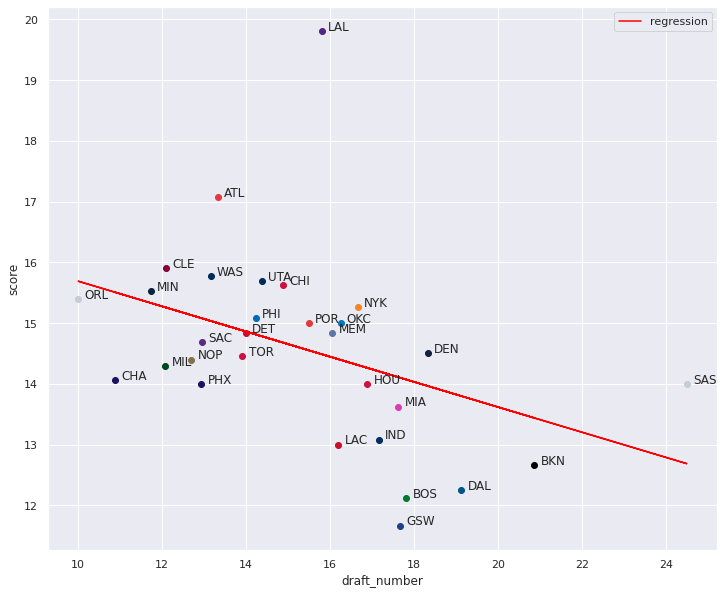

In [12]:
plot = teams_avg_draft_spot_and_avg_score.plot.scatter(x = 'draft_number', y = 'score', figsize = (12,10))
plot


#creating regression line for our plot
line = np.polyfit(teams_avg_draft_spot_and_avg_score['draft_number'], 
                  teams_avg_draft_spot_and_avg_score['score'], 1)
x = np.poly1d(line)
teams_avg_draft_spot_and_avg_score.insert(3, 'regression', 
                                          x(teams_avg_draft_spot_and_avg_score['draft_number']))

teams_avg_draft_spot_and_avg_score.plot(x = 'draft_number', y = 'regression', color = 'Red', ax = plot)
print("score = " + str(line[0]) + " * draft_position" + "+ " + str(line[1]))

#making lists of points to be plotting along with team abbreviation and team color
x = teams_avg_draft_spot_and_avg_score['draft_number']
y = teams_avg_draft_spot_and_avg_score['score']
names = teams_avg_draft_spot_and_avg_score['team_abbreviation']
teams_colors_in_hex = ['#E03A3E', '#000000', '#007A33', '#1D1160', '#CE1141',
                      '#860038', '#00538C', '#0E2240', '#C8102E', '#1D428A', 
                      '#CE1141', '#002D62', '#C8102E', '#552583', '#5D76A9',
                      '#DB3EB1', '#00471B', '#0C2340', '#85714D', '#F58426', 
                      '#007AC1', '#C4CED4', '#006BB6', '#1D1160', '#E03A3E',
                      '#5A2D81', '#C4CED4', '#CE1141', '#002B5C', '#002B5C']




for i, txt in enumerate(names):
    #adding label to points
    plot.annotate(txt, (x[i] + .15, y[i] + .01))
    #plotting point in teams color
    plot.scatter(x[i], y[i], color = teams_colors_in_hex[i])



<p style = "font-family: Helvetica; font-size: 24px'; line-height: 1.5"><b>More Visualization and Machine Learning</b></p>

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5"> </p> 
<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">To get a better understanding of where teams stand compared to other teams, we decided to plot the teams residuals on a map of the US, where the team is located. If they performed below what our model would predict then we would plot a shade of red, while if they performed better than what our model would predict, we would plot a shade of green. The bolder the shade, the better or worse a team performed. </p>


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">To get our data of where teams are located we scraped data from the web. This allowed us to get the longitude and latitude of team’s stadiums so we can plot it on a map </p>

In [13]:
#scraping data for team locations
r = requests.get('http://lionstobakersfield.blogspot.com/2019/01/nba-arenas-with-latitude-and-longitude.html', 
        headers = {"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.0"})
root = BeautifulSoup(r.content, 'html')
table = root.find("table").prettify()

team_stadium_loc_frame = pd.read_html(table)[0]


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">We had to do some data tidying so we were able to join the longitude and latitude columns with the residuals from our model. We also had to drop the formatting of the longitude and latitude to just keep them as floats.</p>

In [14]:
columns = ['team_abbreviation', 'arena_name', 'latitude', 'longitude']

team_stadium_loc_frame.columns = columns

abbrevs = ['ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM',
            'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']

team_stadium_loc_frame['team_abbreviation'] = abbrevs

In [15]:
#tidying longitude and laditude from website
regex = '\d+.\d+'

for idx, row in team_stadium_loc_frame.iterrows():
    lat_reg = re.search(regex, row['latitude'])
    team_stadium_loc_frame.at[idx, 'latitude'] = lat_reg.group(0)
    long_reg = re.search(regex, row['longitude'])
    #All longitudes are west, so change to negative
    team_stadium_loc_frame.at[idx, 'longitude'] = '-' + long_reg.group(0)

team_stadium_loc_frame

,team_abbreviation,arena_name,latitude,longitude
0,ATL,State Farm Arena,33.757,-84.396
1,BOS,TD Garden,42.366,-71.062
2,BKN,Barclays Center,40.683,-73.975
3,CHA,Spectrum Center,35.225,-80.839
4,CHI,United Center,41.881,-87.675
5,CLE,Quicken Loans Arena,41.497,-81.688
6,DAL,American Airlines Center,32.791,-96.81
7,DEN,Pepsi Center,39.749,-105.008
8,DET,Little Caesars Arena,42.341,-83.055
9,GSW,Oracle Arena,37.75,-122.203


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Now that we were able to get our dataframe with the stadium locations, we had to get a column with the residuals from our model. We used <a href = "https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc">statsmodels OLS</a> to get the residuals along with the team abbreviation and stadium location.</p>

In [16]:
#Using OLS to make model of teams draft position and score 
X = teams_avg_draft_spot_and_avg_score['draft_number']
Y = teams_avg_draft_spot_and_avg_score['score']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
resids = results.resid

#Adding the residuals from our model to the dataframe to see how well teams performed
#compared to what our model predicted.
teams_avg_draft_spot_and_avg_score['residual'] = resids

teams_residual_and_location = pd.merge(teams_avg_draft_spot_and_avg_score,team_stadium_loc_frame, on = 'team_abbreviation' )
teams_residual_and_location


,team_abbreviation,score,draft_number,regression,residual,arena_name,latitude,longitude
0,ATL,17.066667,13.333333,14.998672,2.067995,State Farm Arena,33.757,-84.396
1,BKN,12.666667,20.866667,13.438242,-0.771575,Barclays Center,40.683,-73.975
2,BOS,12.125000,17.812500,14.070872,-1.945872,TD Garden,42.366,-71.062
3,CHA,14.058824,10.882353,15.506360,-1.447537,Spectrum Center,35.225,-80.839
4,CHI,15.625000,14.875000,14.679336,0.945664,United Center,41.881,-87.675
5,CLE,15.909091,12.090909,15.256024,0.653067,Quicken Loans Arena,41.497,-81.688
6,DAL,12.250000,19.125000,13.799005,-1.549005,American Airlines Center,32.791,-96.81
7,DEN,14.500000,18.333333,13.962988,0.537012,Pepsi Center,39.749,-105.008
8,DET,14.833333,14.000000,14.860581,-0.027248,Little Caesars Arena,42.341,-83.055
9,GSW,11.666667,17.666667,14.101080,-2.434413,Oracle Arena,37.75,-122.203


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">We were set to plot all our data on a map using folium. For teams that drafted well above what our model predicted (a high positive residual), we made their points stronger shades of green. Teams that drafted worse than our model predicted (negative residual) we plotted in red, with the point being bolder as the residual becomes more negative. We also wanted to plot the teams exact residual in a pop up for each team's point and also include their team logo. So if you click one of the points on the map below, you’ll see a popup with the teams residual from our model and their logo.</p>

In [17]:
#now want to add icon row for each
for i, row in teams_residual_and_location.iterrows():
    teams_residual_and_location.at[i, 'logo'] = "nba_logos/" + str(row['team_abbreviation']) + "logo.png"


teams_residual_and_location = teams_residual_and_location.astype({'latitude': float, 'longitude': float})

team_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

#Adjusting for the Clippers since they share a stadium with the Lakers and want to 
#be able to see both points
teams_residual_and_location.at[12, 'longitude'] = teams_residual_and_location.at[12, 'longitude'] + 0.4

                                                                   
for i, row in teams_residual_and_location.iterrows():
    #encoding image to be used in popup
    encoded = base64.b64encode(open(row['logo'], 'rb').read())
    team_name = row['team_abbreviation']
    val = float('%.3f'%(row['residual']))
    html_string = "<p>" + str(team_name) + ": " + str(val) + "</p> <img src='data:image/png;base64,{}''>"
    #making popup to include team name and residual, along with picture of logo
    html = html_string.format
    iframe = IFrame(html(encoded.decode()), width=80, height=115)
    popup = folium.Popup(iframe, max_width=1000)
    
    
    #Here we establish our gradient for the point to be plotted on map to either be a shade 
    #of green or a shade of red
    
    if row['residual'] >= 2:
        folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, 
                            color="#2EB62C", fill=True, fill_color="#2EB62C", popup = popup).add_to(team_map)
    elif row['residual'] >= 1.5:
        folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, 
                            color="#57C84D", fill=True, fill_color="#57C84D", popup = popup).add_to(team_map)
    elif row['residual'] >= 1:
        folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, 
                            color="#83D475", fill=True, fill_color="#83D475", popup = popup).add_to(team_map)
    elif row['residual'] >= .5:
        folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, 
                            color="#ABE098", fill=True, fill_color="#ABE098", popup = popup).add_to(team_map)
    elif row['residual'] >= 0:
        folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, 
                            color="#C5E8B7", fill=True, fill_color="#C5E8B7", popup = popup).add_to(team_map)
    elif row['residual'] <= -2:
        folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, 
                            color="#DC1C13", fill=True, fill_color="#DC1C13", popup = popup).add_to(team_map)
    elif row['residual'] <= -1.5:
        folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, 
                            color="#EA4C46", fill=True, fill_color="#EA4C46", popup = popup).add_to(team_map)
    elif row['residual'] <= -1:
        folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, 
                            color="#F07470", fill=True, fill_color="#F07470", popup = popup).add_to(team_map)
    elif row['residual'] <= -.5:
        folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, 
                            color="#F1959B", fill=True, fill_color="#F1959B", popup = popup).add_to(team_map)
    elif row['residual'] <= 0:
        folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, 
                            color="#F6BDC0", fill=True, fill_color="#F6BDC0", popup = popup).add_to(team_map)
        
        
team_map

<p style = "font-family: Helvetica; font-size: 24px'; line-height: 1.5"><b>Looking at First Round Draft Picks Since 2005</b></p>


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">After our visualization, we became curious about whether there were any particular draft classes that had a substantial amount of talented basketball players. So we made a violin plot of players' scores with their draft year. What we found was that most draft years actually produce around the same amount of talented players. The violin plots over the years didn’t seem to change much, however some years definitely produced some extremely talented prospects, like in 2018 where we see a high peak.</p>

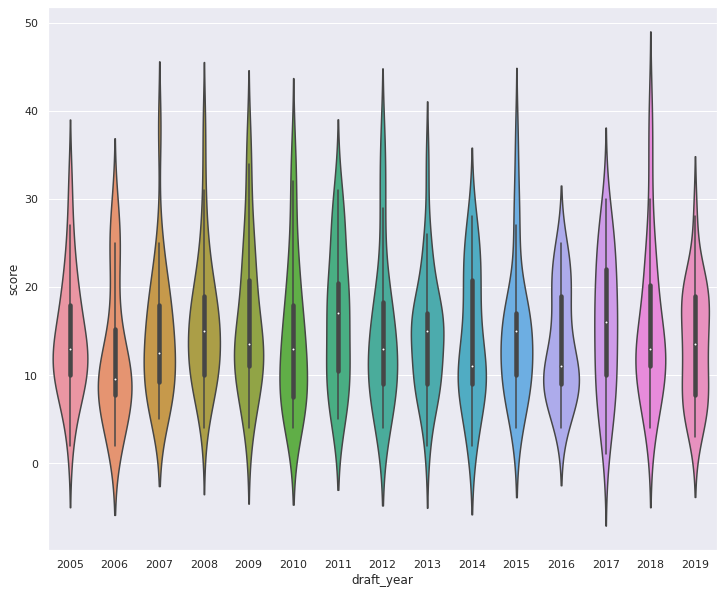

In [18]:
sns.violinplot(data = players_with_scores, x = "draft_year", y = "score")

<p style = "font-family: Helvetica; font-size: 24px'; line-height: 1.5"><b>Looking at Second Round Draft Picks Since 2005</b></p>

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">What we have just looked at up until this point was first round picks and which teams have had the most success at consistently drafting productive players with their first round picks. However, the NBA draft does not just have one single round. The NBA draft has 2 rounds, and, as long as a team does not trade their picks, every team has one first round pick and one second round pick to help bolster their roster.</p>

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">We can look at the same sort of violin plot as we just saw with first round picks, but now with second round picks since 2005 and compare the results of the two. However, first, we have to do the same data cleansing that we did with the first round picks with the second round picks to acquire the data necessary for the violin plot.</p>

In [19]:
non_first_rounders = all_data[all_data['draft_round'] == '2']
non_first_rounders = non_first_rounders.astype({'draft_year': 'int32'})
non_first_rounders_since_2005 = non_first_rounders[non_first_rounders['draft_year'] >= 2005]

In [20]:
# drop seasons under 20 games
over_20_games = non_first_rounders_since_2005['gp'] > 20
second_round_draft_picks_seasons_over_20_games = non_first_rounders_since_2005[over_20_games]
second_round_draft_picks_seasons_over_20_games

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
4002,4002,Orien Greene,BOS,24.0,193.04,94.347136,Louisiana-Lafayette,USA,2005,2,...,3.2,1.8,1.6,-4.3,0.036,0.106,0.145,0.449,0.178,2005-06
4013,4013,Monta Ellis,GSW,20.0,190.50,80.285784,None,USA,2005,2,...,6.8,2.1,1.6,-0.1,0.027,0.106,0.196,0.486,0.152,2005-06
4066,4066,Lou Williams,PHI,19.0,185.42,79.378600,None,USA,2005,2,...,1.9,0.6,0.3,-6.5,0.025,0.134,0.234,0.485,0.120,2005-06
4076,4076,Lawrence Roberts,MEM,23.0,205.74,108.862080,Mississippi State,USA,2005,2,...,1.5,1.5,0.2,1.1,0.166,0.148,0.154,0.471,0.048,2005-06
4098,4098,Travis Diener,ORL,24.0,185.42,79.378600,Marquette,USA,2005,2,...,3.8,0.9,0.7,-13.7,0.017,0.086,0.149,0.614,0.126,2005-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11092,11092,Montrezl Harrell,LAC,26.0,200.66,108.862080,Louisville,USA,2015,2,...,18.7,7.1,1.7,6.3,0.090,0.141,0.245,0.607,0.102,2019-20
11100,11100,Nemanja Bjelica,SAC,31.0,208.28,106.140528,None,Serbia,2010,2,...,11.8,6.4,2.8,-2.0,0.058,0.171,0.171,0.598,0.140,2019-20
11107,11107,Nikola Jokic,DEN,25.0,213.36,128.820128,None,Serbia,2014,2,...,20.5,10.2,6.8,5.1,0.076,0.243,0.268,0.606,0.343,2019-20
11116,11116,Malcolm Brogdon,IND,27.0,195.58,103.872568,Virginia,USA,2016,2,...,16.3,4.7,7.1,2.9,0.028,0.123,0.247,0.537,0.353,2019-20


In [21]:
#aggregating for points, rebounds, assists
players = second_round_draft_picks_seasons_over_20_games.groupby(['player_name', 'draft_year'], as_index = False).agg({'pts': 'mean', 'reb': 'mean', 'ast': 'mean'})
players

,player_name,draft_year,pts,reb,ast
0,AJ Hammons,2016,2.200000,1.600000,0.200000
1,AJ Price,2009,5.350000,1.333333,2.000000
2,Aaron Gray,2007,3.242857,3.728571,0.657143
3,Abdel Nader,2016,4.333333,1.766667,0.500000
4,Admiral Schofield,2019,3.200000,1.300000,0.500000
...,...,...,...,...,...
242,Vernon Macklin,2011,2.000000,1.500000,0.200000
243,Von Wafer,2005,5.100000,1.175000,0.700000
244,Wes Iwundu,2017,4.600000,2.466667,1.000000
245,Will Barton,2012,10.637500,4.075000,2.450000


In [22]:
#summing points, rebounds, and assists for total score
players_with_scores_2nd_round = players
for idx,row in players_with_scores_2nd_round.iterrows():
    players_with_scores_2nd_round.at[idx, 'score'] = row['pts'] + row['reb'] + row['ast']

players_with_scores_2nd_round

,player_name,draft_year,pts,reb,ast,score
0,AJ Hammons,2016,2.200000,1.600000,0.200000,4.000000
1,AJ Price,2009,5.350000,1.333333,2.000000,8.683333
2,Aaron Gray,2007,3.242857,3.728571,0.657143,7.628571
3,Abdel Nader,2016,4.333333,1.766667,0.500000,6.600000
4,Admiral Schofield,2019,3.200000,1.300000,0.500000,5.000000
...,...,...,...,...,...,...
242,Vernon Macklin,2011,2.000000,1.500000,0.200000,3.700000
243,Von Wafer,2005,5.100000,1.175000,0.700000,6.975000
244,Wes Iwundu,2017,4.600000,2.466667,1.000000,8.066667
245,Will Barton,2012,10.637500,4.075000,2.450000,17.162500


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Just like how we saw that the average productivity of first round picks diminishes as the average draft pick of a team increases (later in the draft) in the regression line from above, we can see this same type of trend when comparing the violin plot of first round draft picks by year and second round draft picks by year. The average “score” -- which is the sum of a player’s career average of points, rebounds, and assists --  for second round picks tends to be about 8 - 10 depending on the draft class, while it is about 10 - 15 for first round picks. It makes sense that on average first round picks are more productive than second round picks, but there is one thing that stands out in this violin plot of second round picks -- the outliers. There are many extremely high peaks, some even higher than that of the first round picks (see 2014). While each draft class tends to be skewed downwards (most second round picks are not very productive), there are very clearly certain second round picks who have turned out to be very productive and successful over the course of their NBA career. Now, we want to try to take a look at who these players are and which teams have had the most success since 2005 in finding these "hidden gems" in the second round.</p>

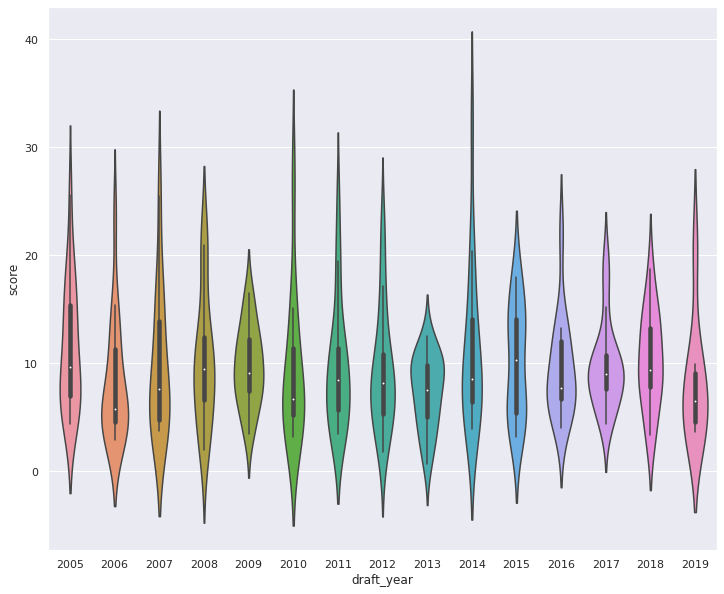

In [23]:
sns.violinplot(data = players_with_scores_2nd_round, x = "draft_year", y = "score")

<p style = "font-family: Helvetica; font-size: 24px'; line-height: 1.5"><b>Hidden Gems</b></p>

In [24]:
#adjusting the season to only have the starting year
regex = "(?P<start_year>\d+)-\d\d"

for idx, row in non_first_rounders_since_2005.iterrows():
    reg = re.search(regex, row['season'])
    non_first_rounders_since_2005.at[idx, 'season'] = reg.group('start_year')

non_first_rounders_since_2005

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
3986,3986,Martynas Andriuskevicius,CLE,20.0,218.44,108.862080,None,Lithuania,2005,2,...,0.0,0.7,0.0,37.1,0.125,0.375,0.042,0.000,0.000,2005
4002,4002,Orien Greene,BOS,24.0,193.04,94.347136,Louisiana-Lafayette,USA,2005,2,...,3.2,1.8,1.6,-4.3,0.036,0.106,0.145,0.449,0.178,2005
4013,4013,Monta Ellis,GSW,20.0,190.50,80.285784,None,USA,2005,2,...,6.8,2.1,1.6,-0.1,0.027,0.106,0.196,0.486,0.152,2005
4066,4066,Lou Williams,PHI,19.0,185.42,79.378600,None,USA,2005,2,...,1.9,0.6,0.3,-6.5,0.025,0.134,0.234,0.485,0.120,2005
4076,4076,Lawrence Roberts,MEM,23.0,205.74,108.862080,Mississippi State,USA,2005,2,...,1.5,1.5,0.2,1.1,0.166,0.148,0.154,0.471,0.048,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11107,11107,Nikola Jokic,DEN,25.0,213.36,128.820128,None,Serbia,2014,2,...,20.5,10.2,6.8,5.1,0.076,0.243,0.268,0.606,0.343,2019
11116,11116,Malcolm Brogdon,IND,27.0,195.58,103.872568,Virginia,USA,2016,2,...,16.3,4.7,7.1,2.9,0.028,0.123,0.247,0.537,0.353,2019
11121,11121,Marc Gasol,TOR,35.0,210.82,115.665960,None,Spain,2007,2,...,7.8,6.5,3.5,10.9,0.030,0.182,0.127,0.551,0.164,2019
11125,11125,Marial Shayok,PHI,24.0,195.58,89.811216,Iowa State,Canada,2019,2,...,1.5,1.5,0.5,-40.0,0.000,0.273,0.214,0.300,0.111,2019


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Once again, we have to take into account the fact that players can change teams during their career (either via trade or free agency). To account for this, we have to look at the rookie season for each second round pick in the data frame and see which team each player played for during their rookie season. After doing this, we can join that data frame with the data frame used in the violin plot to be able to see the career stats of each player (only taking into account seasons where they played over 20 games to avoid skew), along with the team that drafted them.</p>

In [25]:
#now adjusting the dataframe to only have seasons with draft year = start year
non_first_rounders_since_2005 = non_first_rounders_since_2005.astype({'season': 'int32'})
non_first_rounders_since_2005 = non_first_rounders_since_2005.astype({'draft_year': 'int32'})

filter_for_draft_year = non_first_rounders_since_2005['draft_year'] == non_first_rounders_since_2005['season']
rookie_seasons_2nd_round = non_first_rounders_since_2005[filter_for_draft_year]
rookie_seasons_2nd_round

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
3986,3986,Martynas Andriuskevicius,CLE,20.0,218.44,108.862080,None,Lithuania,2005,2,...,0.0,0.7,0.0,37.1,0.125,0.375,0.042,0.000,0.000,2005
4002,4002,Orien Greene,BOS,24.0,193.04,94.347136,Louisiana-Lafayette,USA,2005,2,...,3.2,1.8,1.6,-4.3,0.036,0.106,0.145,0.449,0.178,2005
4013,4013,Monta Ellis,GSW,20.0,190.50,80.285784,None,USA,2005,2,...,6.8,2.1,1.6,-0.1,0.027,0.106,0.196,0.486,0.152,2005
4066,4066,Lou Williams,PHI,19.0,185.42,79.378600,None,USA,2005,2,...,1.9,0.6,0.3,-6.5,0.025,0.134,0.234,0.485,0.120,2005
4076,4076,Lawrence Roberts,MEM,23.0,205.74,108.862080,Mississippi State,USA,2005,2,...,1.5,1.5,0.2,1.1,0.166,0.148,0.154,0.471,0.048,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11067,11067,KZ Okpala,MIA,20.0,203.20,97.522280,Stanford,USA,2019,2,...,1.4,1.0,0.2,-31.7,0.038,0.160,0.102,0.595,0.077,2019
11078,11078,Justin Wright-Foreman,UTA,22.0,182.88,86.182480,Hofstra,USA,2019,2,...,0.0,0.0,0.0,66.7,0.000,0.000,0.000,0.000,0.000,2019
11089,11089,Miye Oni,UTA,22.0,195.58,93.439952,Yale,USA,2019,2,...,0.0,0.4,0.0,-68.0,0.000,0.154,0.100,0.000,0.000,2019
11104,11104,Nicolas Claxton,BKN,20.0,210.82,97.522280,Georgia,USA,2019,2,...,4.4,2.9,1.1,-15.6,0.090,0.112,0.144,0.577,0.142,2019


In [26]:
players_and_draft_teams_2nd_round = rookie_seasons_2nd_round[['player_name', 'team_abbreviation', 'draft_round', 'draft_number', 'draft_year']]
players_and_draft_teams_2nd_round

,player_name,team_abbreviation,draft_round,draft_number,draft_year
3986,Martynas Andriuskevicius,CLE,2,44,2005
4002,Orien Greene,BOS,2,53,2005
4013,Monta Ellis,GSW,2,40,2005
4066,Lou Williams,PHI,2,45,2005
4076,Lawrence Roberts,MEM,2,55,2005
...,...,...,...,...,...
11067,KZ Okpala,MIA,2,32,2019
11078,Justin Wright-Foreman,UTA,2,53,2019
11089,Miye Oni,UTA,2,58,2019
11104,Nicolas Claxton,BKN,2,31,2019


In [27]:
#merging dataframe to have draft info with players scores
players_career_data_2nd_round = pd.merge(players_and_draft_teams_2nd_round, players_with_scores_2nd_round, on = 'player_name')
players_career_data_2nd_round

,player_name,team_abbreviation,draft_round,draft_number,draft_year_x,draft_year_y,pts,reb,ast,score
0,Orien Greene,BOS,2,53,2005,2005,2.350000,1.450000,1.050000,4.850000
1,Monta Ellis,GSW,2,40,2005,2005,17.658333,3.458333,4.491667,25.608333
2,Lou Williams,PHI,2,45,2005,2005,13.820000,2.186667,3.373333,19.380000
3,Lawrence Roberts,MEM,2,55,2005,2005,3.350000,3.150000,0.400000,6.900000
4,Travis Diener,ORL,2,38,2005,2005,4.550000,1.225000,2.000000,7.775000
...,...,...,...,...,...,...,...,...,...,...
198,Admiral Schofield,WAS,2,42,2019,2019,3.200000,1.300000,0.500000,5.000000
199,Cody Martin,CHA,2,36,2019,2019,4.800000,3.200000,1.900000,9.900000
200,Daniel Gafford,CHI,2,38,2019,2019,5.100000,2.500000,0.500000,8.100000
201,Terance Mann,LAC,2,48,2019,2019,1.600000,0.900000,1.100000,3.600000


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Next, we had to determine what “score” determines a productive NBA player, and therefore someone who would be a very successful draft pick for a team in the second round. We took into account that good career averages for a successful NBA guard would be about 12 points, 3 to 4 assists, and a rebound or two. For a big man, a successful career would be about 10 points, 6 rebounds, and maybe an assist or two. Therefore, it seemed logical to deem a “hidden gem” as someone who averaged a total of 17 or more points, rebounds, and assists throughout their career. Using this metric to filter out all players below the threshold, we were able to come up with a list of 20 players drafted since 2005 who can be categorized as a “hidden gem.” Many of these names are very notable and would definitely be considered a hidden gem as a result of being drafted in the second round, including former all stars Paul Millsap, Khris Middleton, and Draymond Green, and 3 time sixth man of the year winner Lou Williams.</p>

In [28]:
#filtering dataframe to only look at "hidden gems"
hidden_gems = players_career_data_2nd_round[players_career_data_2nd_round['score'] > 17]
hidden_gems

,player_name,team_abbreviation,draft_round,draft_number,draft_year_x,draft_year_y,pts,reb,ast,score
1,Monta Ellis,GSW,2,40,2005,2005,17.658333,3.458333,4.491667,25.608333
2,Lou Williams,PHI,2,45,2005,2005,13.820000,2.186667,3.373333,19.380000
31,Paul Millsap,UTA,2,47,2006,2006,14.092857,7.292857,2.300000,23.685714
46,Goran Dragic,PHX,2,45,2008,2008,13.725000,3.008333,4.775000,21.508333
48,DeAndre Jordan,LAC,2,35,2008,2008,9.250000,10.550000,0.941667,20.741667
78,Hassan Whiteside,SAC,2,33,2010,2010,14.266667,12.150000,0.700000,27.116667
98,Chandler Parsons,HOU,2,38,2011,2011,11.575000,4.125000,2.500000,18.200000
99,Isaiah Thomas,SAC,2,60,2011,2011,17.575000,2.412500,4.900000,24.887500
102,Will Barton,POR,2,40,2012,2012,10.637500,4.075000,2.450000,17.162500
112,Khris Middleton,DET,2,39,2012,2012,15.450000,4.450000,3.175000,23.075000


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Looking at the years in which these hidden gems were drafted, we can make some connections to the previous violin plot. For example, we can see that 2009 and 2013 do not have a notable outlier with a high “score” in the violin plot, and we can also see that neither of these years had a hidden gem come out of them.</p>

<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Now, we can organize the hidden gems by putting them into a new data frame with every NBA team along with a list of the hidden gems (if any) that they have found since 2005. We can see that many franchises that have been successful in recent years have been able to find one or more hidden gems, including the Milwaukee Bucks, Miami Heat, Houston Rockets, and Golden State Warriors.</p>

In [29]:
#concatenating hidden gems onto teams that drafted them
hidden_gems_by_team = pd.DataFrame(columns = ['team_abbreviation'], data=abbrevs)
hidden_gems_by_team['hidden_gems_found'] = [''] * 30

hidden_gems_by_team = hidden_gems_by_team.set_index('team_abbreviation')

for idx, row in hidden_gems.iterrows():
    if hidden_gems_by_team.at[row['team_abbreviation'], 'hidden_gems_found'] == '':
        hidden_gems_by_team.at[row['team_abbreviation'], 'hidden_gems_found'] = row['player_name']
    else:
        to_concat = ', ' + row['player_name']
        hidden_gems_by_team.at[row['team_abbreviation'], 'hidden_gems_found'] += to_concat

hidden_gems_by_team

,hidden_gems_found
team_abbreviation,
ATL,
BOS,
BKN,
CHA,Devonte' Graham
CHI,
CLE,
DAL,
DEN,
DET,"Khris Middleton, Spencer Dinwiddie"


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">Lastly, using this same threshold of a career average of 17 total points, rebounds, and assists, we can compare the percentage of first round picks that have been successful to the percentage of second round picks that have been successful.</p>

In [30]:
#finding ratios of successful first round picks
all_first_rounders = players_drafted_round_one_and_after_2005.groupby('player_name', as_index = False).size()
num_first_rounders = len(all_first_rounders.index)

hits_on_first_rounders = players_with_scores[players_with_scores['score'] > 17]
num_hits_on_first_rounders = len(hits_on_first_rounders.index)

#finding ratios of successful second round picks 
all_second_rounders = non_first_rounders_since_2005.groupby('player_name', as_index = False).size()
num_second_rounders = len(all_second_rounders.index)

hits_on_second_rounders = hidden_gems
num_hits_on_second_rounders = len(hits_on_second_rounders)

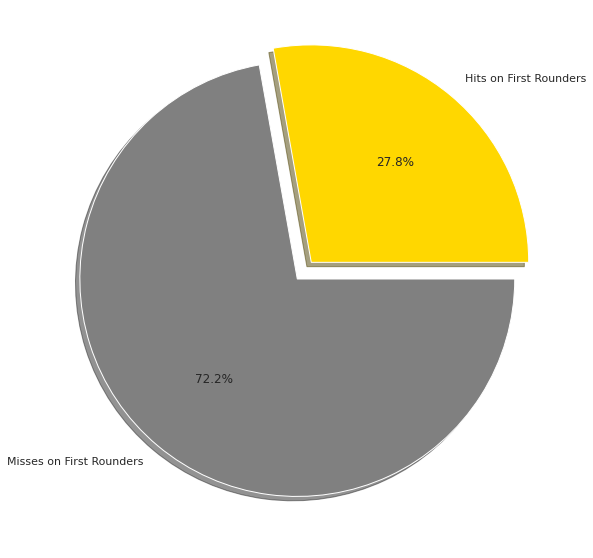

In [31]:
#plotting ratios above in pie chart
y = np.array([num_hits_on_first_rounders, num_first_rounders - num_hits_on_first_rounders])
mylabels = ['Hits on First Rounders', 'Misses on First Rounders']
mycolors = ['#FFD700', '#808080']
myexplode = [0.1, 0]

pyplt.pie(y, labels = mylabels, colors = mycolors, explode = myexplode, shadow = True, autopct='%.1f%%', radius = 1)
pyplt.show()

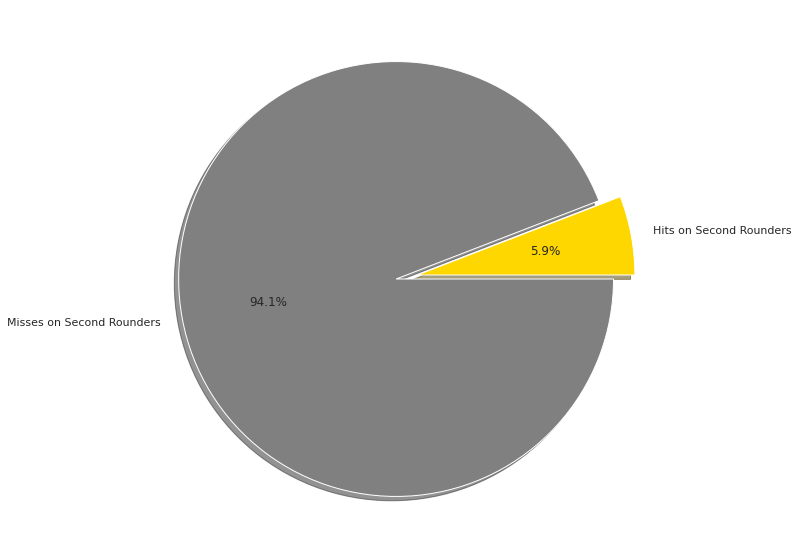

In [32]:
#plotting second round ratios in pie chart
y = np.array([num_hits_on_second_rounders, num_second_rounders - num_hits_on_second_rounders])
mylabels = ['Hits on Second Rounders', 'Misses on Second Rounders']
mycolors = ['#FFD700', '#808080']
myexplode = [0.1, 0]

pyplt.pie(y, labels = mylabels, colors = mycolors, explode = myexplode, shadow = True, autopct='%.1f%%', radius = 1)
pyplt.show()


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">We can clearly see that first rounders are much more likely to end up being productive NBA players than second rounders, at a rate of 27.8% compared to 5.9%. However, 27.8% still is not a very high probability, so it is very important for teams to scout prospects well and make good decisions on draft day. The wrong choice could end up with a team selecting a player like <a href = "https://bleacherreport.com/articles/1188523-remembering-why-the-portland-trail-blazers-chose-greg-oden-over-kevin-durant">Greg Oden over a player like Kevin Durant</a>, a choice that sets the direction of a franchise, for better or for worse, for many years to come.</p>

<p style = "font-family: Helvetica; font-size: 24px'; line-height: 1.5"><b>Conclusion</b></p>


<p style = "font-family: Helvetica; font-size: 16px'; line-height: 1.5">The draft is the most consistent way to improve an NBA team, as each team has a first round pick and a second round pick every year. While free agency is another way to alter the direction of a franchise, not every team can be as fortunate as the Los Angeles Lakers and sign LeBron James. There are certain franchises that struggle mightily to attract talented free agents. Therefore, drafting well, at whatever pick in the draft, is extremely important. While the Lakers did sign LeBron James in 2018, we have also seen the great amount of success they have had in drafting first round talent since 2005. These successful draft picks allowed them to land superstar Anthony Davis in a blockbuster trade, paving the way for their 2020 NBA championship run. However, finding hidden gems in the second round is just as important. Although the Warriors have not had great success at drafting consistently well in the first round, as seen with their negative residual on the regression line, they have found the most hidden gems of all teams since 2005, helping pave the way for their 5 NBA championship appearances and 3 NBA titles in the past 6 years.</p>